<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

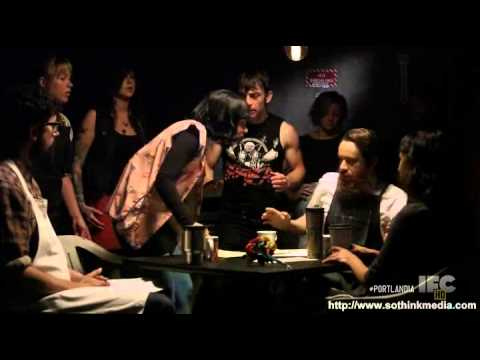

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\User\\PycharmProjects\\Lambda_Unit4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here 

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [5]:
# Base
from collections import Counter

import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [6]:
# Define all of our functions in this cell for readability
def count(docs):

        word_counts = Counter()
        appears_in = Counter()

        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())

        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)

        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

        return wc.sort_values(by='rank')

def get_lemmas(text):

    lemmas = []
    STOP_WORDS = nlp.Defaults.stop_words.union(['check', 'coffee', 'place', ]) # repeating words in both bad and good reviews

    doc = nlp(text)

    for token in doc[2:]: # ignore first two elements containing blank space and date
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON') \
                and (token.is_space == False) and (token.is_digit == False) and (token.text.lower() not in STOP_WORDS):
            lemmas.append(token.lemma_.lower())

    return lemmas


In [7]:
shops.shape

(7616, 3)

In [8]:
shops['star_rating'] = shops['star_rating'].str[:4] # return only numeric portion of star_rating
shops['star_rating'] = shops['star_rating'].astype(float)

In [9]:
shops.head(5)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0


In [12]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [13]:
shops['lemmas'][0]

['love',
 'love',
 'love',
 'atmosphere',
 'corner',
 'shop',
 'style',
 'swing',
 'order',
 'matcha',
 'latte',
 'muy',
 'fantastico',
 'order',
 'get',
 'drink',
 'pretty',
 'streamlined',
 'order',
 'ipad',
 'include',
 'beverage',
 'selection',
 'range',
 'wine',
 'desire',
 'level',
 'sweetness',
 'checkout',
 'system',
 'get',
 'latte',
 'minute',
 'hope',
 'typical',
 'heart',
 'feather',
 'latte',
 'find',
 'list',
 'possibility',
 'art',
 'idea']

In [14]:
wc_bad = count(shops[shops['star_rating'] <= 3].lemmas)
wc_good = count(shops[shops['star_rating'] >= 4].lemmas)

In [15]:
print(wc_good.head(10))
print("-------------------------------------------------------------------------------")
print(wc_bad.head(10))

       word  appears_in  count  rank  pct_total  cul_pct_total  appears_in_pct
193    good        2933   4359   1.0   0.016656       0.016656        0.477687
78    great        2511   3487   2.0   0.013324       0.029981        0.408958
175    like        1677   2434   3.0   0.009301       0.039281        0.273127
30     love        1610   2132   4.0   0.008147       0.047428        0.262215
36   austin        1586   2043   5.0   0.007807       0.055234        0.258306
353    come        1480   1988   6.0   0.007596       0.062831        0.241042
31     shop        1329   1778   7.0   0.006794       0.069625        0.216450
368    time        1344   1778   8.0   0.006794       0.076419        0.218893
32    drink        1277   1734   9.0   0.006626       0.083045        0.207980
116     try        1332   1712  10.0   0.006542       0.089586        0.216938
-------------------------------------------------------------------------------
        word  appears_in  count  rank  pct_total  c

In [32]:
combined_wc = pd.merge(wc_good, wc_bad, how='inner', on='word')
combined_wc['diff_cul_pct'] = abs(combined_wc['cul_pct_total_x'] - combined_wc['cul_pct_total_y']) # find the difference in rel freq

In [41]:
combined_wc.sort_values(by=['diff_cul_pct'], ascending=False, inplace=True)

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


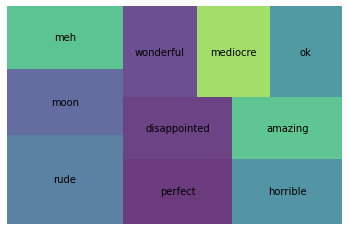

In [42]:
wc_top10 = combined_wc.head(10) # dataframe is already sorted, return top 10 words with largest pct diff

squarify.plot(sizes=wc_top10['diff_cul_pct'], label=wc_top10['word'], alpha=.8)
plt.axis('off')
plt.show()

## Analysis

* The word that has the greatest difference between good and bad reviews is "rude". This makes a lot of sense. Customers who
experience bad service are likely to leave a negative review.

* "Moon" is interesting. I am not quite sure why there is such a difference, or even if it is relevant. However I cannot
say for certainty that it is irrelevant without more domain knowledge/investigation.

* "Meh" would could be relating to food or service.

* "Perfect" would be associated with positive reviews. A user who leaves a negative review would most likely not be using
a word like "perfect".

* "Disappointed" is another negative word that could be related to the food or the service.

* For the rest of the words, the same pattern applies. Words that have a positive meaning would likely be used in positive
reviews. On the flip side, words with negative meaning would typically be used in a negative review. It makes sense why
these words are so different in good and bad reviews.

* Also interesting to note is that "Good" had a high percentage in both good and bad reviews and does not show up in our
plot. This is interesting because at first glance you would assume the word good would be associated mostly with positive
reviews.

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

